## SLIK Preprocessing API

Brief description on how to use the preprocessing module in the slik package. This sample notebook explains some very important methods in the preprocessing module

In [1]:
import sys  
sys.path.insert(0, '/Users/akinwande.komolafe/Downloads/slik_python_package/')


Using slik load file module you only need to specify your data path. Slik can infer the file type that was passed and read it as a pandas dataframe.

Slik `slik.loadfile.read_file` function makes use of the same keyword arguments as pandas read functions. 

In [2]:
from slik import loadfile as lf

You can get a brief summary of the rows and column that was loaded by Slik

In [3]:
train = lf.read_file('data/titanic.csv')


CSV file read sucessfully

Data has 891 rows and 12 columns


Working with a large csv file and you can not load the whole data to Excel or with pandas, with slik you can split a csv into multiple csv files. 

Specify the number of rows that should be present in each csv file

In [14]:
lf.split_csv_file('data/titanic.csv',row_limit=200)

In [4]:
from slik import preprocessing as pp

Slik will identify the data type of each data point, data points with high cardinality and save it in a file. With Slik, data integrity can be done efficiently to validate downstream data points

In [5]:
pp.identify_columns(train,'Survived','PassengerId',project_path='./data')


--------------- Identifying columns present in the data ---------------

Target column is Survived. Attribute in target column:[0, 1]

Features with high cardinality:['Name', 'Ticket', 'Cabin']

{'cat_feat': ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
 'high_card_feat': ['Name', 'Ticket', 'Cabin'],
 'id_column': 'PassengerId',
 'input_columns': ['Pclass',
                   'Name',
                   'Sex',
                   'Age',
                   'SibSp',
                   'Parch',
                   'Ticket',
                   'Fare',
                   'Cabin',
                   'Embarked'],
 'lower_cat': ['Sex', 'Embarked'],
 'num_feat': ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
 'parse_dates': [],
 'target_column': 'Survived'}

Attributes are stored in data/metadata



You can map your data observations more efficiently with Slik by passing the dictionary of the observation you want to map/rename

In [6]:
pp.map_column(train,column_name='Sex',items={'male':1,'female':0})


--------------- Mapping passed column ---------------

male was mapped to 1

female was mapped to 0



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,transformed_Sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


Slik currently relies on the Interquartile range approach to detect outliers present in a data point. Slik also fixes the outlier present in the data using different methods like replacing an outlier with the mean of the data point. You can also select the numerical features you want to perform the operation on. You can also display a table identifying at least 'n' outliers in a row.

In [18]:
det = pp.detect_fix_outliers(train,target_column='Survived',n=2)


--------------- Table identifying at least 2 outliers in a row ---------------



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S


With slik you can check the mssing values in your data and even plot a percentage distribution to see the top 30 missing values in your dataset

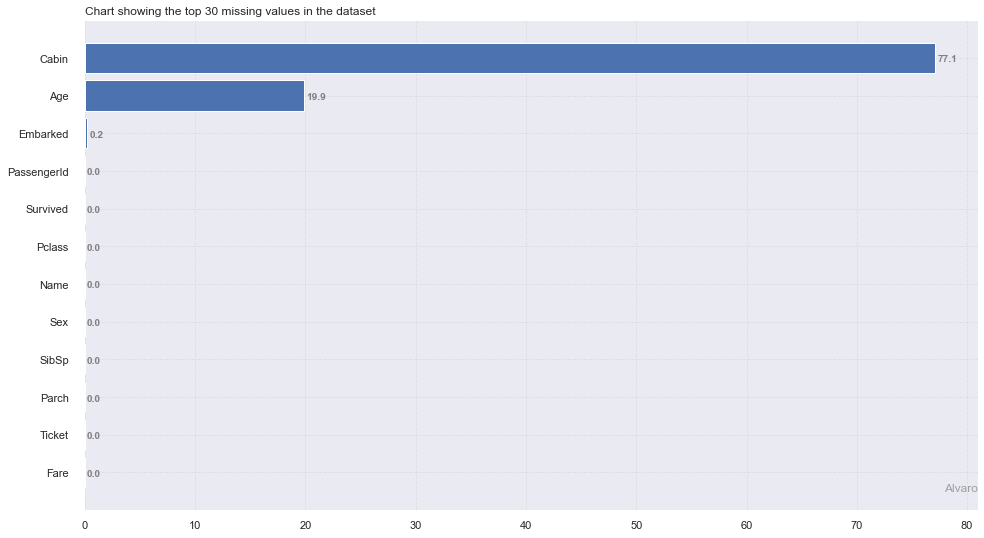


--------------- Count and Percentage of missing value ---------------



,features,missing_counts,missing_percent
0,PassengerId,0,0.0
1,Survived,0,0.0
2,Pclass,0,0.0
3,Name,0,0.0
4,Sex,0,0.0
5,Age,177,19.9
6,SibSp,0,0.0
7,Parch,0,0.0
8,Ticket,0,0.0
9,Fare,0,0.0


In [19]:
pp.check_nan(train,plot=True)

Slik helps to handle the missing values in your data intelligently and efficiently. You can choose a strategy to handle your numerical features 

and pass a value for fillna params to handle your categorical features or fill it with the mode by default. 

You can also drop missing values across the rows and columns using threshold parameters.

In [20]:
data = pp.handle_nan(dataframe=train,target_name='Survived',strategy='mean',fillna='mode',
                     drop_outliers=True,thresh_x=75,thresh_y=50,display_inline=True)


Dropping rows with 75% missing value: Number of records dropped is 0

Dropping Columns with 50% missing value: ['Cabin']

New data shape is (891, 11)


Beyond Slik preprocessing abilities, you can also engineer new features intelligently. 
Slik can help you bin/discretize your age column intelligently and creating new data points with the transformations

In [21]:
pp.bin_age(data,'Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,binned_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1.0,0.000000,A/5 21171,7.250000,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0.000000,PC 17599,32.204208,C,Mid-Age
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0.0,0.000000,STON/O2. 3101282,7.925000,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0.000000,113803,53.100000,S,Mid-Age
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0.0,0.000000,373450,8.050000,S,Mid-Age
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0.0,0.000000,211536,13.000000,S,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0.0,0.000000,112053,30.000000,S,Young Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.081737,1.0,0.381594,W./C. 6607,23.450000,S,Young Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0.0,0.000000,111369,30.000000,C,Young Adult


with Slik you can infer the schema of your pandas dataframe and save the schema file in a project path you define

In [22]:
# import ,yaml
pp.create_schema_file(train,target_column='Survived',project_path='Titanic',id_column='PassengerId')


--------------- Creating Schema file ---------------



{'dtype': {'PassengerId': 'int64',
  'Survived': 'int64',
  'Pclass': 'int64',
  'Name': 'object',
  'Sex': 'object',
  'Age': 'float64',
  'SibSp': 'int64',
  'Parch': 'int64',
  'Ticket': 'object',
  'Fare': 'float64',
  'Cabin': 'object',
  'Embarked': 'object'}}



Schema file stored in Titanic/metadata


with Slik you can also drop uninformative field in your pandas dataframe

In [23]:
data = pp.drop_uninformative_fields(data).head()


--------------- Dropping uninformative fields ---------------

uninformative fields dropped: []


Slik helps you manage your data points better by handling different management operations techniques on pandas dataframe based on columns. 

Operations include selecting of columns, dropping column and dropping duplicates. By selecting the list data points that you need to perform the transformation on and choosing the particular transformation you want 

In [7]:
pp.manage_columns(train,['PassengerId'],drop_duplicates='columns').head()


--------------- Dropping duplicates across the columns ---------------

New datashape is (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Trim whitespaces from ends of each value across all data points in a pandas dataframe

In [25]:
pp.trim_all_columns(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Slik can clean your data in one line of code. The `slik.preprocessing.preprocess` function cleans your data
by removing outliers present in the data, handing missing values, featurizing datetime columns, and mapping relevant columns.
The functions saves the preprocessed file in a project path that you specify.

In [28]:
pp.preprocess(data=train,target_column='Survived',train=True,display_inline=True,project_path='./Titanic',logging='display')


The task for preprocessing is classification

Dropping rows with 75% missing value: Number of records dropped is 0

Dropping Columns with 75% missing value: ['Cabin']

New data shape is (891, 11)

--------------- Mapping target columns ---------------

0 was mapped to 0

1 was mapped to 1


--------------- Bucketize Age columns ---------------

 Inferred age column: [Age]

--------------- Mapping passed column ---------------

male was mapped to 0

female was mapped to 1


--------------- Dropping uninformative fields ---------------

uninformative fields dropped: []

--------------- Creating Schema file ---------------



{'dtype': {'PassengerId': 'int64',
  'Pclass': 'int64',
  'Name': 'object',
  'Age': 'float64',
  'SibSp': 'float64',
  'Parch': 'float64',
  'Ticket': 'object',
  'Fare': 'float64',
  'Embarked': 'object',
  'transformed_Survived': 'int64',
  'binned_Age': 'object',
  'transformed_Sex': 'int64'}}



Schema file stored in Titanic/data/metadata

--------------- Preview the preprocessed data ---------------



,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,transformed_Survived,binned_Age,transformed_Sex
0,1,3,"Braund, Mr. Owen Harris",22.0,1.0,0.0,A/5 21171,7.250000,S,0,Young Adult,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0.0,PC 17599,32.204208,C,1,Mid-Age,1
2,3,3,"Heikkinen, Miss. Laina",26.0,0.0,0.0,STON/O2. 3101282,7.925000,S,1,Young Adult,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0.0,113803,53.100000,S,1,Mid-Age,1
4,5,3,"Allen, Mr. William Henry",35.0,0.0,0.0,373450,8.050000,S,0,Mid-Age,0



--------------- Preprocessed data saved ---------------


 Input data preprocessed successfully and stored in ./Titanic/data/train_data.pkl

